In [ ]:
import math 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # специальное отображение графиков для pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMA-EMA/Adj_close_9.csv", index_col=['Date'], parse_dates=['Date'], dtype=np.float64)
df

,AAPL,BA,CVX,JNJ,MCD,MMM,MRK,NIKE,PFE
Date,,,,,,,,,
1980-02-01,0.095495,1.887721,1.540306,0.606842,0.504497,1.687597,0.538131,0.129549,0.210424
1980-03-01,0.095495,1.911495,1.543855,0.607831,0.503021,1.619411,0.545737,0.129549,0.210424
1980-04-01,0.095495,2.096938,1.536757,0.616726,0.510397,1.619411,0.549540,0.129549,0.218139
1980-07-01,0.095495,2.173017,1.536757,0.615738,0.505972,1.627934,0.554294,0.129549,0.218139
1980-08-01,0.095495,2.206303,1.550953,0.640446,0.513348,1.687597,0.570457,0.129549,0.228660
...,...,...,...,...,...,...,...,...,...
2021-03-05,132.315247,235.190002,105.529999,165.210007,235.559998,198.610001,75.980003,133.029999,39.441368
2021-04-05,127.633202,233.630005,106.110001,167.770004,233.860001,199.380005,75.989998,131.550003,39.560196
2021-05-05,127.882790,228.179993,108.959999,167.070007,235.039993,201.440002,77.699997,132.210007,39.580002


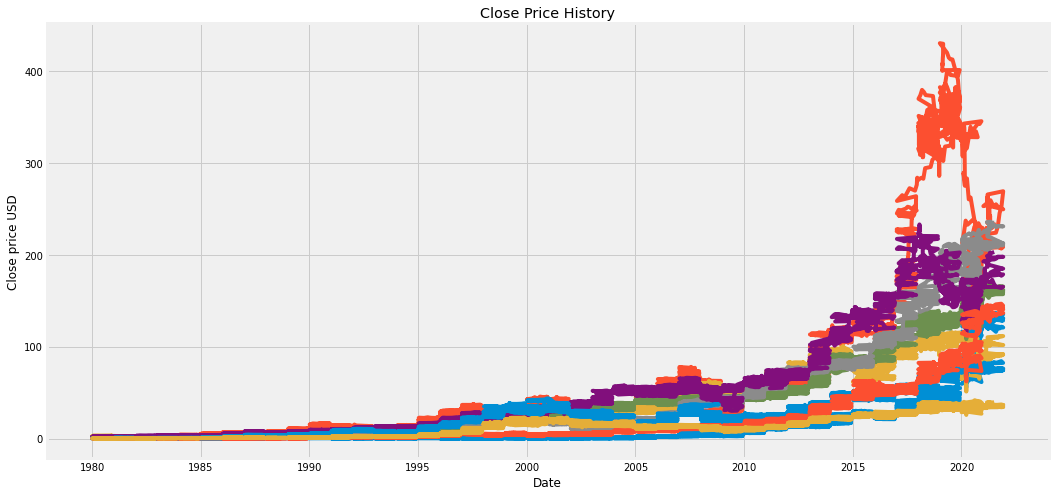

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Close price USD')
plt.show()

In [ ]:
def SMA(X, w=5):
    return np.sum(X[len(X)-w:])/w

In [ ]:
def EMA(X, t=5, alpha=0.2):
    result=np.zeros((1,X.shape[1]),dtype=float)
    for i in range(min(t,len(X))):
        result+=alpha*((1-alpha)**i)*X[len(X)-i-1:len(X)-i].values
    return result

In [ ]:
def DEMA(X, t=5, alpha=0.2):
    result=2*EMA(X,t,alpha)
    ema_arrays=np.zeros((t,X.shape[1]),dtype=float)
    for i in range(t):
        ema_arrays[i]+=EMA(X[:(len(X) if i==0 else -i)],t,alpha)[0]
    result-=EMA(pd.DataFrame(ema_arrays),t,alpha)
    return result

In [ ]:
def TEMA(X,t=5,alpha=0.2):
    result=3*EMA(X,t,alpha)
    ema_arrays=np.zeros((t*2,X.shape[1]),dtype=float)
    ema_arrays2=np.zeros((t,X.shape[1]),dtype=float)
    for i in range(t*2):
        ema_arrays[i]+=EMA(X[:(len(X) if i==0 else -i)],t,alpha)[0]
    result-=3*EMA(pd.DataFrame(ema_arrays),t,alpha)
    for i in range(t):
        ema_arrays2[i]+=EMA(pd.DataFrame(ema_arrays[:(len(X) if i==0 else -i)]),t,alpha)[0]
    result+=EMA(pd.DataFrame(ema_arrays2))
    return result

In [ ]:
print(df.columns)
df[-1:].values/df[:1].values

Index(['AAPL', 'BA', 'CVX', 'JNJ', 'MCD', 'MMM', 'MRK', 'NIKE', 'PFE'], dtype='object')


array([[1363.52695953,  124.73771336,   71.42736378,  277.66700393,
         465.49334486,  120.33086513,  145.70802277, 1063.76736216,
         188.09642436]])

In [ ]:
window=5
result_sum=1.0
result_sum_array=[]
for i in range(window,len(df)-1):
    index=np.argmax(EMA(df[:i],window,1.0/window)/df[i-1:i])
    # print(EMA(df[:i],window,1.0/window)/df[i-1:i])
    result_sum*=df[df.columns[index]][i+1]/df[df.columns[index]][i]
    result_sum_array.append(result_sum)

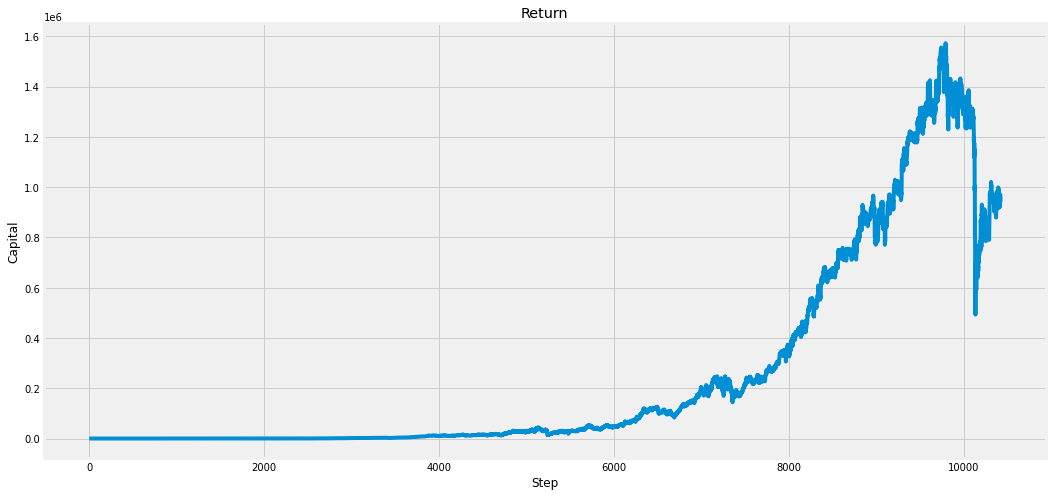

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Return')
plt.plot(result_sum_array)
plt.xlabel('Step')
plt.ylabel('Capital')
plt.show()

In [ ]:
result_sum

975603.58049444

In [ ]:
result_sum/np.max(df[-1:].values/df[:1].values)

715.5000300346851

# DEMA

In [ ]:
window=10
result_sum=1.0
result_sum_array=[]
for i in range(window,len(df)-1):
    index=np.argmax(DEMA(df[:i],window,1/window)/df[i-1:i])
    result_sum*=df[df.columns[index]][i+1]/df[df.columns[index]][i]
    result_sum_array.append(result_sum)

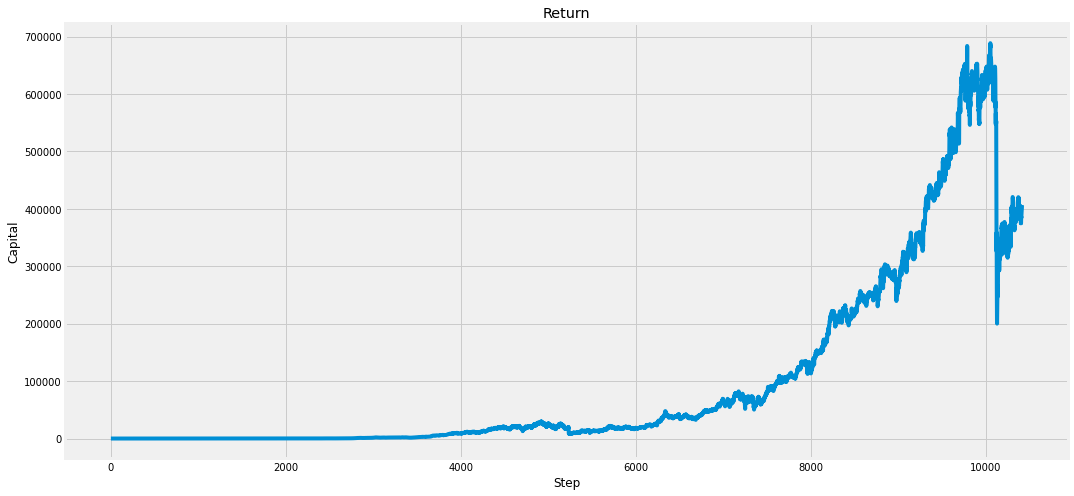

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Return')
plt.plot(result_sum_array)
plt.xlabel('Step')
plt.ylabel('Capital')
plt.show()

In [ ]:
result_sum

406418.7913186401

In [ ]:
result_sum/np.max(df[-1:].values/df[:1].values)

298.0643605754014

# TEMA

In [ ]:
window=10
result_sum=1.0
result_sum_array=[]
for i in range(window,len(df)-1):
    index=np.argmax(TEMA(df[:i],window,1.0/window)/df[i-1:i])
    result_sum*=df[df.columns[index]][i+1]/df[df.columns[index]][i]
    result_sum_array.append(result_sum)

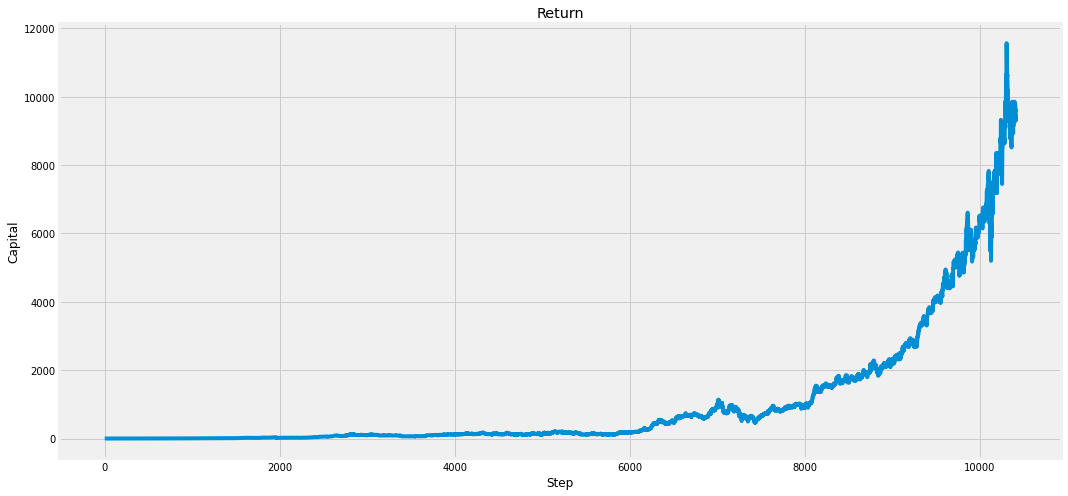

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Return')
plt.plot(result_sum_array)
plt.xlabel('Step')
plt.ylabel('Capital')
plt.show()

In [ ]:
result_sum

9481.601337511913

In [ ]:
result_sum/np.max(df[-1:].values/df[:1].values)

6.953732209888447